# Problem Set 3 

<h4>Designed by Xide Xia, with help from Ashok Cutkosky and Brian Kulis. <br> </h4>


---

This assignment will introduce you to:
1. Train a CNN model.
2. Save/restore and fine-tune with model weights.
3. Tensorboard toolkit (optional).
4. Neural style transfer learning. 

This code has been tested on Colab. 


---

## Preamble

To run and solve this assignment, you need an interface to edit and run ipython notebooks (`.ipynb` files). The easiest way to complete this assignment is to use Google Colab. You can just copy the assignment notebook to your google drive and open it, edit it and run it on Google Colab. All libraries you need are pre-installed on Colab.

---

### Local installation
The alternative is to have a local installation, although we do not recommend it. If you are working on Google Colab, feel free to skip to the next section "More instructions". We recommend using virtual environments for all your installations. Following is one way to set up a working environment on your local machine for this assignment, using [Anaconda](https://www.anaconda.com/distribution/): 

- Download and install Anaconda following the instructions [here](https://docs.anaconda.com/anaconda/install/)
- Create a conda environment using `conda create --name dl_env python=3` (You can change the name of the environment instead of calling it `dl_env`)
- Now activate the environment using : `conda activate dl_env`
- Install jupyter lab, which is the [jupyter project's](https://jupyter.org/index.html) latest notebook interface : `pip install jupyterlab`. You can also use the classic jupyter notebooks and there isn't any difference except the interface.
- Install other necessary libraries. For this assignment you need `numpy`, `scipy` , [`pytorch`](https://pytorch.org/get-started/locally/) and `matplotlib`, all of which can be installed using : `pip install <lib_name>`. Doing this in the environment, would install these libraries for `dl_env`. You can also use `conda install`.
- Now download the assignment notebook in a local directory and launching `jupyter lab` in the same directory should open a jupyter lab session in your default browser, where you can open and edit the ipython notebook.
- For deactivating the environment when you are done with it, use : `conda deactivate`.

For users running a Jupyter server on a remote machine :
- Launch Jupyter lab on the remote server (in the directory with the homework ipynb file) using : `jupyter lab --no-browser --ip=0.0.0.0`
- To access the jupyter lab interface on your local browser, you need to set up ssh port forwarding. This can be done by running : `ssh -N -f -L localhost:8888:localhost:8888 <remoteuser>@<remotehost>`. You can now open `localhost:8888` on your local browser to access jupyter lab. This assumes you are running jupyter lab on its default port 8888 on the server.
- Check "Making life easy" section at the end of [this post](https://ljvmiranda921.github.io/notebook/2018/01/31/running-a-jupyter-notebook/) to find how to add functions to your bash run config to do this more easily each time. The post mentions functions for jupyter notebook, but just replace those with jupyter lab if you are using that interface.

The above instructions specify one way of working on the assignment. You can use other virtual environments/ipython notebook interfaces etc. (**not recommended**).

---

### More instructions

If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

To enter your solutions for the written questions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$. We will not accept handwritten solutions.

Put your solutions into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. (Double) click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

**Submission instructions:** please upload your completed solution file (having run all code cells and rendered all markdown/Latex) to the Google Form posted on Piazza by the due date (see Schedule for due dates and late policy).  

Note: `Vector` stands for `column vector` below. 

---


# Problem 1: Convolutional Networks (40 points)

In this part, we will experiment with CNNs in PyTorch. You will need to read the documentation of the functions provided below to understand how they work.

**GPU Training.** Smaller networks will train fine on a CPU, but you may want to use GPU training for this part of the homework. You can run your experiments on Colab's GPUs or on BU's  [Shared Computing Cluster (SCC)](http://www.bu.edu/tech/services/research/computation/scc/). You may find this SCC tutorial helpful: [SCC tutorial](http://rcs.bu.edu/classes/CS542/SC542.html). To get access to a GPU on Colab, go to `Edit->Notebook Settings` in the notebook and set the hardware accelerator to "GPU".

### 1.1 Training a CNN on SVHN

In last homework, we implemented a 2-layer MLP network on the [SVHN Dataset](http://ufldl.stanford.edu/housenumbers/).

The SVHN dataset consists of photos of house numbers, collected automatically using Google's Street View. Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. Google’s Street View imagery contains hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. Below are example images from the dataset. Note that for this dataset, each image (32x32 pixels) has been cropped around a single number in its center, which is the number we want to classify.

![SVHN images](http://ufldl.stanford.edu/housenumbers/32x32eg.png)


In this homework, we will create and train a convolutional network (CNN) on the [SVHN Dataset](http://ufldl.stanford.edu/housenumbers/).


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

### 1.1.0 Data Download
First, download the SVHN dataset using `torchvision` and display the RGB images in the first batch. Take a look at the [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) tutorial for an example. Follow the settings used there, such as the normalization, batch size of 4 for the `torch.utils.data.DataLoader`, etc.

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.SVHN(root='./data', split='train',
                                        transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.SVHN(root='./data', split='test',
                                        transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


    8     3     2     9


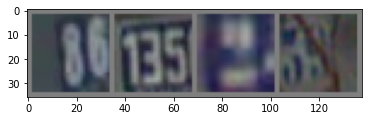

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 1.1.1 CNN Model
Next, we will train a CNN on the data. We have defined a simple CNN for you with two convolutional layers and two fully-connected layers below.

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

Instantiate the cross-entropy loss `criterion`, and an SGD optimizer from the `torch.optim` package with learning rate $.001$ and momentum $.9$. You may also want to enable GPU training using `torch.device()`.

In [5]:
# solution here
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = .9)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

### 1.1.2 Training
Write the training loop that makes two full passes through the dataset (two epochs) using SGD. Your batch size should be 4.

Go slack off for a while...

![reddit xkcd comic](https://i.redd.it/5cjdqxcg07k11.png)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        ## -- ! code required
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.251
[1,  4000] loss: 2.235
[1,  6000] loss: 2.230
[1,  8000] loss: 1.871
[1, 10000] loss: 0.979
[1, 12000] loss: 0.707
[1, 14000] loss: 0.635
[1, 16000] loss: 0.613
[1, 18000] loss: 0.597
[2,  2000] loss: 0.498
[2,  4000] loss: 0.504
[2,  6000] loss: 0.486
[2,  8000] loss: 0.478
[2, 10000] loss: 0.472
[2, 12000] loss: 0.468
[2, 14000] loss: 0.452
[2, 16000] loss: 0.486
[2, 18000] loss: 0.442
Finished Training


### 1.1.3 Test Accuracy
Load the test data (don't forget to move it to GPU if using). Make predictions on it using the trained network and compute the accuracy. You should see an accuracy of above 80%.

In [8]:
def test_on_SVHN(net, testloader):
    n = 0
    acc = torch.tensor(0).to(device)
    ## -- ! code required  
    for data in testloader:
      input, labels = data
      input, labels = input.to(device), labels.to(device)
      y_pred = torch.argmax(net.forward(input), 1)
      acc = torch.add(acc, torch.sum(y_pred == labels))
      n += len(labels)
    
    return (acc / n).item()

acc = test_on_SVHN(net, testloader)
print('Accuracy of the network on the 10000 test images: %f %%' % (acc))

Accuracy of the network on the 10000 test images: 0.846766 %



### 1.2. Understanding the CNN Architecture

Explain the definition of the following terms. What are the trade-offs of various choices in each setting?

  - Stride
  - Padding
  - Non-linearity
  - Pooling
  - Loss function
  - Optimizer
  - Learning rate
  - Momentum


Your answer:
Stride: the interval between the windows in a convolutional layer, a lower stride is more computationally complex but can detect more features.

Padding: Bits added to the edges of images to avoid output shrinking, there are various schemes like zero padding, average padding, wrap around padding, all with their own advantages and drawbacks.

Non-linearity: Activation functions such as sigmoid, elu, tanh that can transform linear outputs into non-linear outputs. Without these, a network made up of pure linear layers will overall be linear.

Pooling: A pooling layer reduces the dimension of a feature map. There are several ways to do pooling, such as max pooling and average pooling. Adding these layers can reduce computational complexity but can lose information.

Loss function: Function that describes how good the predictions of a model are. Something like MSE is good for regression, while cross-entropy loss is good for categorization.

Optimizer: The aglorithm to reduce loss, such as SGD, adam, etc. Each optimizer has its own advantages and disadvantages.

Learning rate: The rate at which the optimizer changes the parameters of the model. A learning rate that is too low may take a very long time to converge, one that is too high risks oscillating and never converging.

Momentum: Since in SGD the true gradient is being estimated by small batches, momentum can help "accelerate" the estimated gradient in the correct direction and reduce the iterations needed to converge. However, momentum is a new hyperparameter that must be carefully chosen.

### 1.3. Improving SVHN accuracy

We will now vary the architecture and training hyper-parameters of the network to try and achieve a higher accuracy on the SVHN dataset. Note that human performance on this dataset achieves around a 2% error, as reported in

- *Convolutional Neural Networks Applied to House Numbers Digit Classification*,
Pierre Sermanet, Soumith Chintala, Yann LeCun [ [pdf](https://arxiv.org/pdf/1204.3968.pdf) ]

You may want to read the above paper, as it provides the first exploration of deep learning for this problem. It is possible to achieve an error of less than 2% with modern deep learning methods, see for example this paper:
- *Batch-normalized Maxout Network in Network*, by Chang and Chen
[ [pdf](https://arxiv.org/pdf/1511.02583.pdf) ]

We do not expect you to achieve such results, but you should be able to improve on the initial accuracy we got and increase it to above 90%. It is more important that you try varying different architecture and training settings to understand how they affect (or not) the results.

### 1.3.1 Architecture 
First, try to vary the structure of the network. For example, you can still use  two  convolutional layers, but vary their parameters. You can also try adding more convolutional, pooling and/or fully-connected (FC) layers.

Keep careful track of performance as a function of architecture changes using a table or a plot. For example, you can report the final test accuracy on 3 different numbers of channels (filters), 3 different sizes of kernels, 3 different strides, and 3 different dimensions of the final fully connected layer, using a table like the one below. Each time when you vary one parameter, you should **keep the others fixed at the original value**. 

|# of Filter|Accuracy|
|--|-------------------------------|
| 10 | 86.1% | 
| 30 | 87.1% |
| 100 | 87.7% |

|Activation|Accuracy|
|--|-------------------------------|
| sigmoid | 19.6% |
| tanh | 86.0% |
| elu | 88.2% |

|#Extra FC layers|Accuracy|
|--|-------------------------------|
| 1 | 80.9% |
| 2 | 82.5% |
| 3 | 84.5% |

|FC size|Accuracy|
|--|-------------------------------|
| 128 | 88.6% |
| 256 | 90.3% |
| 384 | 90.6% |

Explain your results. Note, you're welcome to decide how many training epochs to use, but do report the number you used and keep it the same for all architecture changes (as well as other training hyper-parameters). Be careful not to change more than one thing between training/test runs, otherwise you will not know which of the multiple changes caused the results to change.

**Please implement your experiments in a separate cell, DO NOT change your codes in Q1.1 for this question. During submission, you are Not required to submit any code for this question.**

I used 4 training epochs for all of these experiments. 

Increasing the number of filters in the conv2d layers improved accuracy. This is probably because the convolutional layers were able to detect a larger variety of features, although the accuracy increase due to more filters seems to be capped around 88%.

Changing the activations to tanh and elu resulted in improved accuracy, likely because these offer slightly more flexibility with negative values than relu. Sigmoid destroyed the model's accuracy, which is an interesting finding. As we discussed in class, sigmoid can run into a problem where the derivative of sigmoid when its input is very large can shrink to 0, which hinders learning. That might be one possible explanation here.

Adding extra FC layers actually reduced accuracy. This could be indicative of overfitting being introduced, or the lack of extra features for the deeper layers to detect.

The best accuracy increase, 90.6% is achieved with increasing the size of the fully connected layers. It seems that there are some complex interactions between features here that can be detected by a wider layer.

In [38]:
def trainNet(test_net):
  test_optimizer = torch.optim.SGD(test_net.parameters(), lr = 0.001, momentum = .9)
  for epoch in range(4):  # loop over the dataset multiple times
    print("Epoch %d..." % (epoch + 1))
    for i, data in enumerate(trainloader, 0):
        ## -- ! code required
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        test_optimizer.zero_grad()
        outputs = test_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        test_optimizer.step()
        

In [10]:
#Try different numbers of filters
def filterTestNet(n_filters = 6):
  class CustomNet(nn.Module):
      def __init__(self):
          super(CustomNet, self).__init__()
          self.conv1 = nn.Conv2d(3, n_filters, 5)
          self.pool = nn.MaxPool2d(2, 2)
          self.conv2 = nn.Conv2d(n_filters, 16, 5)
          self.fc1 = nn.Linear(16 * 5 * 5, 64)
          self.fc2 = nn.Linear(64, 32)
          self.fc3 = nn.Linear(32, 10)

      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 16 * 5 * 5)   # flatten features

          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)
          return x
  return CustomNet().to(device)

In [35]:
for n_filters in [10, 30, 100]:
  testNet = filterTestNet(n_filters)
  print("Training with %d filters... " % n_filters)
  trainNet(testNet)
  print("\nTesting...")
  print("Accuracy: %.3f" % test_on_SVHN(testNet, testloader))
  

Training with 10 filters... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...

Testing...
Accuracy: 0.861
Training with 30 filters... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...

Testing...
Accuracy: 0.871
Training with 100 filters... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...

Testing...
Accuracy: 0.877


In [33]:
def connectedTest(mult_factor = 1):
  class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.mult_factor = mult_factor
        self.conv1 = nn.Conv2d(3, 6 * mult_factor, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6 * mult_factor, 16 * mult_factor, 5)
        self.fc1 = nn.Linear(16 * mult_factor * 5 * 5, 64 * mult_factor)
        self.fc2 = nn.Linear(64 * mult_factor, 32 * mult_factor)
        self.fc3 = nn.Linear(32 * mult_factor, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5 * self.mult_factor)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
  return CustomNet().to(device)

In [34]:
for mult_factor in [2, 4, 6]:
  testNet = connectedTest(mult_factor)
  print("Training with dimensions increased *%d... " % mult_factor)
  trainNet(testNet)
  print("Testing...")
  print("Accuracy: %.3f" % test_on_SVHN(testNet, testloader))

Training with dimensions increased *2... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.886
Training with dimensions increased *4... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.903
Training with dimensions increased *6... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.906


In [19]:
def activationTest(activation='relu'):
  class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.activation = activation
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        if self.activation == 'sigmoid':
          x = self.pool(torch.sigmoid(self.conv1(x)))
          x = self.pool(torch.sigmoid(self.conv2(x)))
        elif self.activation == 'tanh':
          x = self.pool(torch.tanh(self.conv1(x)))
          x = self.pool(torch.tanh(self.conv2(x)))
        elif self.activation == 'elu':
          x = self.pool(F.elu(self.conv1(x)))
          x = self.pool(F.elu(self.conv2(x)))
        else:
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 16 * 5 * 5)   # flatten features

        if self.activation == 'sigmoid':
          x = torch.sigmoid(self.fc1(x))
          x = torch.sigmoid(self.fc2(x))
        elif self.activation == 'tanh':
          x = torch.tanh(self.fc1(x))
          x = torch.tanh(self.fc2(x))
        elif self.activation == 'elu':
          x = F.elu(self.fc1(x))
          x = F.elu(self.fc2(x))
        else:
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
            
        x = self.fc3(x)
        return x
  return CustomNet().to(device)

In [20]:
for act_fn in ["sigmoid", "tanh", "elu"]:
  testNet = activationTest(act_fn)
  print("Training with %s activation... " % act_fn)
  trainNet(testNet)
  print("Testing...")
  print("Accuracy: %.3f" % test_on_SVHN(testNet, testloader))

Training with sigmoid activation... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.196
Training with tanh activation... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.860
Training with elu activation... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.882


In [21]:
def layerTest(n_layers = 0):
  class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.extraLayer1 = False
        self.extraLayer2 = False
        self.extraLayer3 = False
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        if n_layers >= 1:
          self.addlLayer1 = nn.Linear(64, 64)
          self.extraLayer1 = True
        if n_layers >= 2:
          self.addlLayer2 = nn.Linear(64, 64)
          self.extraLayer2 = True
        if n_layers >= 3:
          self.addlLayer3 = nn.Linear(64, 64)
          self.extraLayer3 = True
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        if self.extraLayer1:
          x = F.relu(self.addlLayer1(x))
        if self.extraLayer2:
          x = F.relu(self.addlLayer2(x))
        if self.extraLayer3:
          x = F.relu(self.addlLayer3(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
  return CustomNet().to(device)

In [24]:
for n_layers in [1, 2, 3]:
  testNet = layerTest(fc_dim)
  print("Training with %d additional fully connected layers... " % n_layers)
  trainNet(testNet)
  print("Testing...")
  print("Accuracy: %.3f" % test_on_SVHN(testNet, testloader))

Training with 1 additional fully connected layers... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.809
Training with 2 additional fully connected layers... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.825
Training with 3 additional fully connected layers... 
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.845


### 1.3.2 Training Hyper-Parameters

Repeat the process for training hyper-parameters, exploring at least three of the following:
- training iterations, optionally with early stopping
- learning rate
- momentum
- optimizer
- initialization
- dropout
- batch normalization
- dataset augmentation

Document your results with tables or figures, and explain what happened. You may want to use Tensorboard (see Problem 2 below) but this is optional.

What is the best accuracy you were able to achieve on the test set, and which factors contributed the most to the improvement? (A good result should be above 85%.)

**Please implement your experiments in a separate cell, DO NOT change your codes in Q1.1 for this question. During submission, you are Not required to submit any code for this question.**


|Learning rate|Accuracy|
|--|-------------------------------|
| 1e-2 | 19.6% | 
| 1e-4 | 80.8% |
| 1e-5 | 19.6% |

|Momentum|Accuracy|
|--|-------------------------------|
| .2 | 82.8% |
| .5 | 84.0% |
| 1.1 | 6.7% |

|Optimizer|Accuracy|
|--|-------------------------------|
| adamw | 87.5% |
| adam | 85.5% |
| asgd | 86.8% |


When the learning rate is too high or too low, the model does not converge. Shifting it to 1e-4 doesn't ruin the model but does decrease accuracy. A better learning rate is somewhere near 1e-3.

Lowering momentum slightly decreases accuracy, while increasing momentum to 1.1 ruins the model. It seems that .9 is in a sweet spot for momentum in this problem.

The best accuracy was achieved with the adamw optimizer. Each of the optimizers achieved good results, and each one's unique properties will work better for different problems.

In [51]:
def hyperparameterTrainNet(test_net, learning_rate = .001, momentum = .9, optimizer_type = 'sgd'):
    if optimizer_type == 'admw':
        test_optimizer = torch.optim.AdamW(test_net.parameters(), lr = learning_rate)
    elif optimizer_type == 'adam':
        test_optimizer = torch.optim.Adam(test_net.parameters(), lr = learning_rate)
    elif optimizer_type == 'asgd':
        test_optimizer = torch.optim.ASGD(test_net.parameters(), lr = learning_rate)
    else:
        test_optimizer = torch.optim.SGD(test_net.parameters(), lr = learning_rate, momentum = momentum)
    
    for epoch in range(4):  # loop over the dataset multiple times
        print("Epoch %d..." % (epoch + 1))
        for i, data in enumerate(trainloader, 0):
            ## -- ! code required
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            test_optimizer.zero_grad()
            outputs = test_net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            test_optimizer.step()
        

In [52]:
for learning_rate in [.01, .0001, .00001]:
    print("Training with learning rate %f..." % learning_rate)
    net = Net().to(device)
    hyperparameterTrainNet(net, learning_rate = learning_rate)
    print("Testing...")
    print("Accuracy: %.3f" % test_on_SVHN(net, testloader))
    

Training with learning rate 0.010000...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.196
Training with learning rate 0.000100...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.808
Training with learning rate 0.000010...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.196


In [55]:
for momentum in [.2, .5, 1.1]:
    print("Training with momentum %f..." % momentum)
    net = Net().to(device)
    hyperparameterTrainNet(net, momentum = momentum)
    print("Testing...")
    print("Accuracy: %.3f" % test_on_SVHN(net, testloader))

Training with momentum 0.200000...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.828
Training with momentum 0.500000...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.840
Training with momentum 1.100000...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.067


In [54]:
for optimizer_type in ['adamw', 'adam', 'rprop']:
    print("Training with optimizer %s..." % optimizer_type)
    net = Net().to(device)
    hyperparameterTrainNet(net, optimizer_type = optimizer_type)
    print("Testing...")
    print("Accuracy: %.3f" % test_on_SVHN(net, testloader))

Training with optimizer adamw...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.875
Training with optimizer adam...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.855
Training with optimizer rprop...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Testing...
Accuracy: 0.868



---


# Problem 2: Tensorboard (Optional)

Explore your network using Tensorboard. Tensorboard is a nice tool for visualizing how your network's training is progressing. The following tutorial provides an introduction to Tensorboard

- [Visualizing models, data and training with Tensorboard](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)

For using tensorboard in colab, run the following cell and it should open a tensorboard interface in the output of the cell.


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs


---

# Problem 3: Save and restore model weights (30 points)

In this section you will learn to save the weights of a trained model, and to load the weights of a saved model. This is really useful when we would like to load an already trained model in order to continue training or to fine-tune it. Often times we save “snapshots” of the trained model as training progresses in case the training is interrupted, or in case we would like to fall back to an earlier model, this is called snapshot saving.


## 3.1 Saving and Loading Weights
In this section you will learn how to [save and load pytorch models for inference](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference).

### 3.1.1 State_dict
In PyTorch, the learnable parameters (i.e. weights and biases) of an torch.nn.Module model are contained in the model’s parameters (accessed with model.parameters()). A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor. Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers.

Print out the keys of state_dict of the model you trained in Q1.1. (Note state_dict is a property of the module object.)

In [ ]:
# solution here
net.state_dict().keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])

### 3.1.2 Save state_dict

Save the state_dict of the model in Q1.1.4 with the torch.save() function to a local path.

In [ ]:
# solution here
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/HW3_updatedMarch1/net.pt"
torch.save(net.state_dict(), path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 3.1.3 Load state_dict

Now let's initiate net2 which has the same structure, and load the weights you saved to net2 by using load_state_dict().

In [ ]:
net2 = Net()

## -- ! code required  
net2.load_state_dict(torch.load(path))

<All keys matched successfully>

Test net2's performance on SVHN.

In [ ]:
# solution here
net2.to(device)
test_on_SVHN(net2, testloader)

0.8395436406135559

### 3.2 Fine-tune  a pre-trained model on CIFAR-10

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is another popular benchmark for image classification.


![cifar10_teaser](cifar10.png)

### 3.2.0 Data Download
Similar to Q1.1.2, download the CIFAR-10 dataset using `torchvision` and display the RGB images in the first batch. 

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
    6     7     5     4


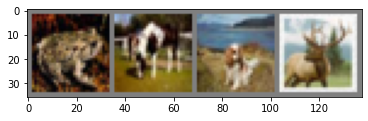

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

cifar10_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        transform=transform, download=True)
cifar10_trainloader = torch.utils.data.DataLoader(cifar10_trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
cifar10_testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        transform=transform, download=True)
cifar10_testloader = torch.utils.data.DataLoader(cifar10_testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# get some random training images
cifar10_dataiter = iter(cifar10_trainloader)
images, labels = cifar10_dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].numpy() for j in range(4)))

### 3.2.1 Load state_dict partially

Let's define net_cifar = Net(), and only load selected weights in selected_layers. 

In [ ]:
#odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])

net_cifar = Net()
selected_layers = ['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias']

## -- ! code required

pretrained_dict = {k: v for k, v in net.state_dict().items() if k in selected_layers}

new_dict = net_cifar.state_dict()
new_dict.update(pretrained_dict)
net_cifar.load_state_dict(new_dict)


<All keys matched successfully>

In [ ]:
print(np.array_equal(net_cifar.state_dict()['conv1.weight'].cpu().numpy(), net.state_dict()['conv1.weight'].cpu().numpy()))
print(np.array_equal(net_cifar.state_dict()['fc3.weight'].cpu().numpy(), net.state_dict()['fc3.weight'].cpu().numpy()))

True
False


### 3.2.2 Fine-tune net_cifar on CIFAR-10

Fine-tune the net_cifar on CIFAR-10 (you need to train and test the accuracy of net_cifar on CIFAR10 test set instead of on SVHN test set), and show the plot of training loss.

In [ ]:
criterion = nn.CrossEntropyLoss()
net_cifar_optimizer = torch.optim.SGD(net_cifar.parameters(), lr = 0.001, momentum = .9)
net_cifar.to(device)

#Only train the last two layers
for param in list(net_cifar.parameters())[:-2]:
  param.requires_grad = False

In [ ]:
# solution here
training_losses = []
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(cifar10_trainloader, 0):
        ## -- ! code required
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        net_cifar_optimizer.zero_grad()
        outputs = net_cifar(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        net_cifar_optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            training_losses.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.359
[1,  4000] loss: 1.254
[1,  6000] loss: 1.240
[1,  8000] loss: 1.242
[1, 10000] loss: 1.249
[1, 12000] loss: 1.222
[2,  2000] loss: 1.242
[2,  4000] loss: 1.238
[2,  6000] loss: 1.223
[2,  8000] loss: 1.212
[2, 10000] loss: 1.241
[2, 12000] loss: 1.249
Finished Training


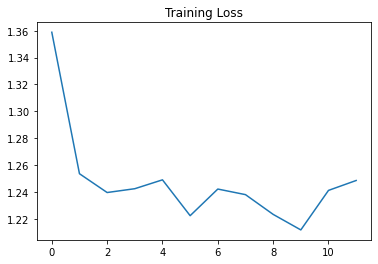

In [ ]:
import matplotlib.pyplot as plt
plt.title("Training Loss")
plt.plot(training_losses)

In [ ]:
n = 0
acc = torch.tensor(0).to(device)
for data in cifar10_testloader:
  input, labels = data
  input, labels = input.to(device), labels.to(device)
  y_pred = torch.argmax(net_cifar.forward(input), 1)
  acc = torch.add(acc, torch.sum(y_pred == labels))
  n += len(labels)

(acc / n).item()



0.5406000018119812


---

# Problem 4: Neural style transfer (30 points)

In this problem, we will use deep learning to compose one image in the style of another image. This is known as [neural style transfer](https://towardsdatascience.com/a-brief-introduction-to-neural-style-transfer-d05d0403901d) and the technique is outlined in paper [A Neural Algorithm of Artistic Style (Gatys et al.)](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf). Please read the paper before you proceed with Problem 4.

Neural style transfer is an optimization technique used to take two images—a content image and a style reference image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image.

This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style reference image. These statistics are extracted from the images using a convolutional network.

![inputs](https://www.tensorflow.org/tutorials/generative/style_transfer_files/output__UWQmeEaiKkP_0.png)
![output](https://www.tensorflow.org/tutorials/generative/style_transfer_files/output_iYSLexgRKSh-_0.png)

In [5]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

## 4.0 Visualize the inputs

We provide two images, starry.jpg and golden.jpg, for style and content input respectively. To save runtime, we downscale the images to (128,128). You are welcome to play with your own inputs at any resolution scale (note a larger resolution requires more runtime). To upload files to your colab notebook, you can click on  `files` on the left side of your notebook then choose upload.

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# desired size of the output image
imsize = (128,128)

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader("starry.jpg")
content_img = image_loader("golden.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

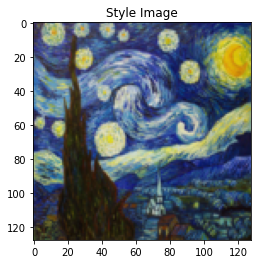

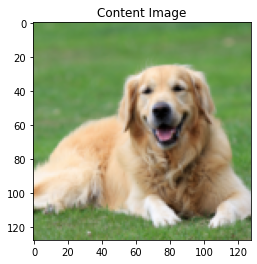

In [27]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

## 4.1 Loss functions

The cost function has two terms - a content loss term and a style loss term, both of which are explained below.

### 4.1.1 Content Loss

The content of an image is represented by the values of the intermediate feature maps.  This is based on the intuition that images with similar content will have similar representation in the higher layers of the network. Let $p$ and $x$ be the original image and the image that is generated,

<img src="content_loss.png" width="300">

where $P^l$ is the representation of the original image and $F^l$ is the representation of the generated image in the feature maps of layer $l$.

Finish the ContentLoss() to match the corresponding content target representations. (hint: You can implement the ContentLoss using pytorch buildin mse_loss())

In [66]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        self.target = target.detach()

    def forward(self, input): 
        self.loss = F.mse_loss(input, self.target) 
        return input


### 4.1.2 Style Loss

The style loss is implemented similarly to the content loss. It will act as a transparent layer in a network that computes the style loss of that layer. In order to calculate the style loss, we need to compute the gram matrix. A gram matrix is the result of multiplying a given matrix by its transposed matrix. 

<img src="gram.png" width="200">


Let $~a$ and $~x$ be the original image and the image that is generated, 

<img src="style_loss.png" width="300">

Here, $A^l$ is the representation of the original image and $G^l$ is the representation of the generated image in layer $l$. $N_l$ is the number of feature maps and $M_l$ is the size of the flattened feature map in layer $l$. $w_l$ is the weight given to the style loss of layer $l$.

Complete the gram_matrix() to alculate a Gram matrix that includes this information and finish the StyleLoss().

In [59]:
def gram_matrix(input):
    a,b,c,d = input.size()
    input_2D = input.view(a * b, c * d)
    gram = torch.mm(input_2D, input_2D.t())
    
    return gram.div(a * b * c * d)

class StyleLoss(nn.Module):

    def __init__(self, target):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target).detach()
        
    def forward(self, input):        
        self.loss = F.mse_loss(gram_matrix(input), self.target)
        return input

### 4.1.3 Import a pre-trained VGG-19.

Now we need to import a pre-trained neural network. We will use a 19 layer VGG network like the one used in the paper.

Import a pretrained VGG-19 from [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html). Make sure to set the network to evaluation mode using .eval().

In [39]:
## -- ! code required  
cnn = models.vgg19(pretrained=True).features.to(device).eval()

### 4.1.4 VGG-19 pre-processing

VGG networks are trained on images with each channel normalized by mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]. 

Complete Normalization() to normalize the image before sending it into the network.

In [50]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# create a module to normalize input image so we can easily put it in a nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()    
        self.mean = mean.clone().detach().view(-1, 1, 1) #.view(-1, 1, 1)
        self.std = std.clone().detach().view(-1, 1, 1) #.view(-1, 1, 1)

    def forward(self, img):
        # normalize img
        return (img - self.mean) / self.std

### 4.1.5 Get content/style representations

Choose intermediate layers from the network to represent the style and content of the image. Use the selected intermediate layers of the model to get the content and style representations of the image. In this problem, you are using the VGG19 network architecture, a pretrained image classification network. These intermediate layers are necessary to define the representation of content and style from the images. 

Complete the get_style_model_and_losses() so you can easily extract the intermediate layer values.

In [49]:
def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img, content_layers, style_layers):
    cnn = copy.deepcopy(cnn)

    # normalization module
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # just in order to have an iterable access to or list of content/syle losses
    content_losses = []
    style_losses = []

    # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))
            
        model.add_module(name, layer)

        if name in content_layers:
            ## -- ! code required
            
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)            
            
                     
        if name in style_layers:
            ## -- ! code required  
            
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)
            
            
    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break
    model = model[:(i + 1)]
    return model, style_losses, content_losses



## 4.2 Build the model

### 4.2.1 Perform the neural transfer
 
Finally, we must define a function that performs the neural transfer. To transfer the style of an artwork $~a$ onto a photograph $~p$ we synthesise a new image that simultaneously matches the content representation of $~p$ and the style representation of $~a$. Thus we jointly minimise the distance of the feature representations of an initial image from the content representation of the photograph in one layer and the style representation of the painting defined on a number of layers of the Convolutional Neural Network. The loss function we minimise 

<img src="total_loss.png" width="400">

where α and β are the weighting factors for content and
style reconstruction, respectively.

For each iteration of the networks, it is fed an updated input and computes new losses. We will run the backward methods of each loss module to dynamicaly compute their gradients. The paper recommends LBFGS, but Adam works okay, too.

Compelte the run_style_transfer().

In [64]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1,
                       content_layers=content_layers_selected,
                       style_layers=style_layers_selected):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img, content_layers, style_layers)

    optimizer = optim.Adam([input_img.requires_grad_()], lr=0.1, eps=1e-1)

    
    print('Optimizing..')
    run = [0]
    while run [0]<= num_steps:

        def closure():
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            
            style_score = sum([sl.loss for sl in style_losses]) * style_weight
            content_score = sum([cl.loss for cl in content_losses]) * content_weight

            loss = style_score + content_score
            loss.backward()
        
            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()
            
            return style_score + content_score
         
        optimizer.step(closure)
    # a last correction...
    input_img.data.clamp_(0, 1)

    return input_img

### 4.2.2 Test your model

Now you have done your coding tasks, let's test them!

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 787.366760 Content Loss: 41.506180

run [100]:
Style Loss : 154.428757 Content Loss: 40.888519



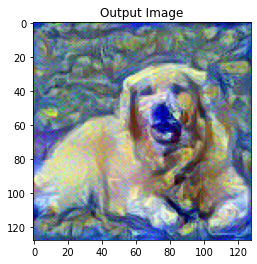

In [67]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

## 4.3 Content/style loss weight ratio

Try two different style loss weights: 5000 and  10. Discuss what you learn from the results.

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 5.540777 Content Loss: 13.163807

run [100]:
Style Loss : 3.510985 Content Loss: 11.658713



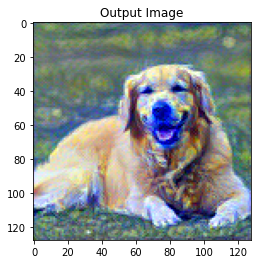

In [68]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
style_weight=5000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 0.283692 Content Loss: 0.003655

run [100]:
Style Loss : 0.283272 Content Loss: 0.003861



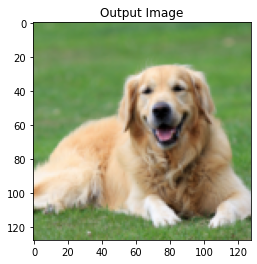

In [69]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
style_weight=10
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

When the style weight is much lower, the model doesn't learn the style as well, since style loss contributes much less to overall loss. Therefore the produced image looks pretty much the same as the original.

## 4.4 Choose different intermediate layers

Try three different intermediate layers for style representations: conv_1, conv_3 and conv_5. Discuss what you learn from the results.

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 2.284443 Content Loss: 3.393045

run [100]:
Style Loss : 0.944146 Content Loss: 2.796999



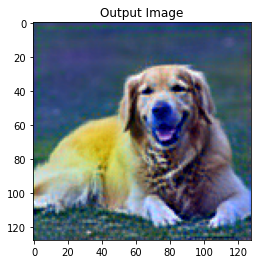

In [70]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 107.223686 Content Loss: 29.924814

run [100]:
Style Loss : 25.676685 Content Loss: 29.189644



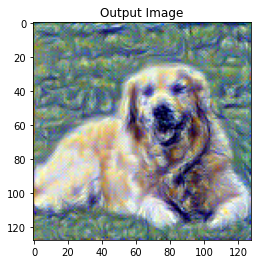

In [71]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_3']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 493.526459 Content Loss: 46.109024

run [100]:
Style Loss : 101.974243 Content Loss: 42.739468



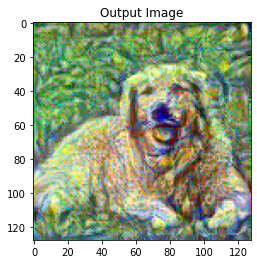

In [72]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_5']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

***your solution:***

Treating different convolutional layers as style layers will result in different associations in the image learning the style from the same associations in the style image. For example, if a certain layer detects the edges of the dog, that layer will be more in the style of the style image. Treating different layers as the style images results in different produced images.